# San Francisco Bike Sharing Trips 

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back to another position

This data was created with information obtained from Lift Bike Sharing Site
https://www.lyft.com/bikes/bay-wheels

This dataset contains anonymized trips data of Lyft bike sharing system, in the Bay Area from January 2019 to May 2019.



https://www.kaggle.com/jolasa/bay-area-bike-sharing-trips

This data contain on 10 features: 

* Month: Month when trip occured 
* Trip_duration_sec: Trip duration in seconds
* start_station_id: Trip Starting Station (id)
* start_station_name: Trip Starting Station (name)
* end_station_id: Trip Ending Station (id)
* end_station_name: Trip Ending Station (name)
* bike_id: Bike Identifier
* user_type: User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
* member_birth_year: Member Birth Year
* member_gender: Member Gender (Male/ Female) 

# Tools

## Import Python Library

In [268]:
import matplotlib.pyplot as plt # Import matplot with an alias called "plt"
import numpy as np # Import numpy with an alias called "np"
import pandas as pd # Import pandas with an alias called "pd"
import seaborn as sns # Import seaborn with an alias called "sns"

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


# Data and Design

## Load/Read Data sets  

In this section we will Load, Read, and Exploar our Dataset 

1- Load Dataset - Importing CSV into python 
2- Read Dataset 
3- Exploar Dataset to get more information such as Datatype, Column name, and totale of Column and row 


Note: 

Since there is 5 seprate data sets in each sheet that represnt a month, I merge the seprate files into one 

In [269]:
data1 = pd.read_csv('2019 - 01.csv') # Load first data set that represnt January month
data2 = pd.read_csv('2019 - 02.csv') # Load Second data set that represnt Feb month
data3 = pd.read_csv('2019 - 03.csv') # Load thirs data set that represnt March month
data4 = pd.read_csv('2019 - 04.csv') # Load 4th data set that represnt April month
data5 = pd.read_csv('2019 - 05.csv') # Load 5th data set that represnt May month

data = pd.concat([data1, data2, data3, data4, data5]) #merge into one variable

In [270]:
data # read the data

,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,January,80825,229.0,Foothill Blvd at 42nd Ave,196.0,Grand Ave at Perkins St,4861,Subscriber,1989.0,Male
1,January,65900,4.0,Cyril Magnin St at Ellis St,134.0,Valencia St at 24th St,5506,Subscriber,1989.0,Male
2,January,62633,245.0,Downtown Berkeley BART,157.0,65th St at Hollis St,2717,Customer,1965.0,Female
3,January,44680,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,4557,Customer,1974.0,Male
4,January,60709,16.0,Steuart St at Market St,28.0,The Embarcadero at Bryant St,2100,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
182158,May,193,121.0,Mission Playground,223.0,16th St Mission BART Station 2,1338,Subscriber,NaN,NaN
182159,May,145,253.0,Haste St at College Ave,267.0,Derby St at College Ave,1051,Subscriber,1997.0,Male
182160,May,173,120.0,Mission Dolores Park,121.0,Mission Playground,795,Customer,NaN,NaN
182161,May,305,243.0,Bancroft Way at College Ave,249.0,Russell St at College Ave,3367,Subscriber,1997.0,Male


In [271]:
#Rename the featuer name's to be more suitable
data.rename(columns = {'trip_duration_sec':'TripDur', 'start_station_id':'SStationId',
                              'end_station_id':'EStationId'
                      , 'start_station_name':'S.StationName',
                        'end_station_name':'E.StationName',
                       'bike_id':'BikeId',
                       'user_type':'UserType',
                       'member_birth_year':'MemberBirth',
                     'member_gender':'MemberGender',
                      'month':'Month'}, inplace = True)

In [272]:
data.sample(10) #check after rename

,Month,TripDur,SStationId,S.StationName,EStationId,E.StationName,BikeId,UserType,MemberBirth,MemberGender
156436,May,254,52.0,McAllister St at Baker St,74.0,Laguna St at Hayes St,1416,Subscriber,1970.0,Male
182370,January,474,16.0,Steuart St at Market St,66.0,3rd St at Townsend St,1903,Subscriber,1980.0,Male
52072,March,1141,72.0,Page St at Scott St,25.0,Howard St at 2nd St,1192,Customer,1978.0,Male
95300,April,537,67.0,San Francisco Caltrain Station 2 (Townsend St...,88.0,11th St at Bryant St,242,Subscriber,1981.0,Male
20651,January,1139,37.0,2nd St at Folsom St,345.0,Hubbell St at 16th St,3711,Subscriber,1988.0,Male
20391,March,253,67.0,San Francisco Caltrain Station 2 (Townsend St...,89.0,Division St at Potrero Ave,5541,Subscriber,1984.0,Male
135577,January,633,63.0,Bryant St at 6th St,58.0,Market St at 10th St,3451,Subscriber,1981.0,Male
170791,Februrary,201,385.0,Woolsey St at Sacramento St,241.0,Ashby BART Station,4677,Subscriber,1968.0,Male
62559,Februrary,1033,50.0,2nd St at Townsend St,87.0,Folsom St at 13th St,1052,Customer,1955.0,Female
143323,March,680,81.0,Berry St at 4th St,15.0,San Francisco Ferry Building (Harry Bridges Pl...,5566,Subscriber,1991.0,Male


In [273]:
data.info() # Get more details about data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053067 entries, 0 to 182162
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Month          1053067 non-null  object 
 1   TripDur        1053067 non-null  int64  
 2   SStationId     1052322 non-null  float64
 3   S.StationName  1052322 non-null  object 
 4   EStationId     1052322 non-null  float64
 5   E.StationName  1052322 non-null  object 
 6   BikeId         1053067 non-null  int64  
 7   UserType       1053067 non-null  object 
 8   MemberBirth    1003691 non-null  float64
 9   MemberGender   1003697 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 88.4+ MB


## Handling Missing Values and Inappropriate Values / Change Data type / Add New Column

In [274]:
data.isnull().sum() # Count how many Null values

Month                0
TripDur              0
SStationId         745
S.StationName      745
EStationId         745
E.StationName      745
BikeId               0
UserType             0
MemberBirth      49376
MemberGender     49370
dtype: int64

In [275]:
data.shape # Check the the shape (Number of Col and row) of data including Null values

(1053067, 10)

In [276]:
data.dropna(inplace=True) # Remove all rows that include the Null 

In [277]:
data.shape # Check the shape of data after removing 

(1002956, 10)

In [278]:
data.isnull().sum() # Count how many Null values

Month            0
TripDur          0
SStationId       0
S.StationName    0
EStationId       0
E.StationName    0
BikeId           0
UserType         0
MemberBirth      0
MemberGender     0
dtype: int64

In [279]:
data.dtypes # Check the Col data type 

Month             object
TripDur            int64
SStationId       float64
S.StationName     object
EStationId       float64
E.StationName     object
BikeId             int64
UserType          object
MemberBirth      float64
MemberGender      object
dtype: object

If you noticed the MemberBirth Col which is represent the the member birth year it's in float type and it's inappropriate to have decimal values in year, so it's need to convert into intger. 

Note: 
same issue with SStationId, EStationId

In [280]:
data['MemberBirth'] = data.MemberBirth.astype(int)
data['SStationId'] = data.SStationId.astype(int)
data['EStationId'] = data.EStationId.astype(int)

In [281]:
data.dtypes #check after changing 

Month            object
TripDur           int64
SStationId        int64
S.StationName    object
EStationId        int64
E.StationName    object
BikeId            int64
UserType         object
MemberBirth       int64
MemberGender     object
dtype: object

In [282]:
data.head() #read the data after change 

,Month,TripDur,SStationId,S.StationName,EStationId,E.StationName,BikeId,UserType,MemberBirth,MemberGender
0,January,80825,229,Foothill Blvd at 42nd Ave,196,Grand Ave at Perkins St,4861,Subscriber,1989,Male
1,January,65900,4,Cyril Magnin St at Ellis St,134,Valencia St at 24th St,5506,Subscriber,1989,Male
2,January,62633,245,Downtown Berkeley BART,157,65th St at Hollis St,2717,Customer,1965,Female
3,January,44680,85,Church St at Duboce Ave,53,Grove St at Divisadero,4557,Customer,1974,Male
5,January,6733,245,Downtown Berkeley BART,266,Parker St at Fulton St,3532,Subscriber,1994,Male


I noticed on MemberBirth col some members their age above 100 ! (There is one member his/her age 133 ! ) and in my side this Inappropriate values to someone can ride the bike 

In [283]:
data[data['MemberBirth' ]< 1919].sort_values(ascending=True , by=['MemberBirth'] ) #check

,Month,TripDur,SStationId,S.StationName,EStationId,E.StationName,BikeId,UserType,MemberBirth,MemberGender
27370,Februrary,1474,15,San Francisco Ferry Building (Harry Bridges Pl...,386,24th St at Bartlett St,6436,Customer,1878,Female
113766,April,655,136,23rd St at San Bruno Ave,386,24th St at Bartlett St,7048,Customer,1878,Female
116113,April,371,110,17th & Folsom Street Park (17th St at Folsom St),386,24th St at Bartlett St,6858,Customer,1878,Female
197150,March,328,127,Valencia St at 21st St,136,23rd St at San Bruno Ave,5907,Customer,1878,Female
195932,March,425,136,23rd St at San Bruno Ave,127,Valencia St at 21st St,6168,Customer,1878,Female
...,...,...,...,...,...,...,...,...,...,...
193392,April,1010,213,32nd St at Adeline St,160,West Oakland BART Station,6697,Customer,1904,Other
197015,April,423,160,West Oakland BART Station,213,32nd St at Adeline St,4990,Customer,1904,Other
150108,Februrary,727,81,Berry St at 4th St,284,Yerba Buena Center for the Arts (Howard St at ...,5356,Subscriber,1910,Other
92568,April,1689,400,Buchanan St at North Point St,400,Buchanan St at North Point St,1282,Customer,1911,Male


In [284]:
# drop values that include 100 above based on age:
data.drop(data[data['MemberBirth' ]< 1919].index, inplace = True) 
data.shape # check the data shape


(1001031, 10)

In MemberGender col it's sposes to contain 2 Values which is Male or Female, but I noticed there is third value it's called "other" with 19280 values 

In [285]:
data['MemberGender'].value_counts() #Count MemberGender Values

Male      742942
Female    238809
Other      19280
Name: MemberGender, dtype: int64

In [286]:
# drop values that equal Other :
data.drop(data[data['MemberGender' ]== 'Other'].index, inplace = True) 
data.shape # check the data shape

(918225, 10)

In [287]:
data['MemberBirth'].loc[2018]

2018    1994
2018    1985
2018    1996
2018    1990
Name: MemberBirth, dtype: int64

Let's add new column that contain age range: 
- Kida ----> less than 16 year
- Adult ---> less than or equal 65 year
- Old ---> greater than 65 year

In [288]:
# Create Funcation for range age
def Range(MemberBirth):
    if MemberBirth >= 2003: 
        return 'Kids'
    elif MemberBirth >= 1954:
        return 'Adult'
    else:
        return 'OLD'

In [289]:
Range(1955) # Test the Range funcation

'Adult'

In [290]:
# Add New column Calle Range and apply the range funcation
data['Range'] = data.MemberBirth.apply(Range) 
# Read data 
data.head()

,Month,TripDur,SStationId,S.StationName,EStationId,E.StationName,BikeId,UserType,MemberBirth,MemberGender,Range
1,January,65900,4,Cyril Magnin St at Ellis St,134,Valencia St at 24th St,5506,Subscriber,1989,Male,Adult
2,January,62633,245,Downtown Berkeley BART,157,65th St at Hollis St,2717,Customer,1965,Female,Adult
5,January,6733,245,Downtown Berkeley BART,266,Parker St at Fulton St,3532,Subscriber,1994,Male,Adult
6,January,1188,34,Father Alfred E Boeddeker Park,146,30th St at San Jose Ave,5114,Subscriber,1984,Male,Adult
7,January,1254,318,San Carlos St at Market St,314,Santa Clara St at Almaden Blvd,3967,Subscriber,1991,Male,Adult


In [291]:
# Check the data shape after add new column 
data.shape

(918225, 11)

# EDA

### 1- Most bike user's Female of Male ? 

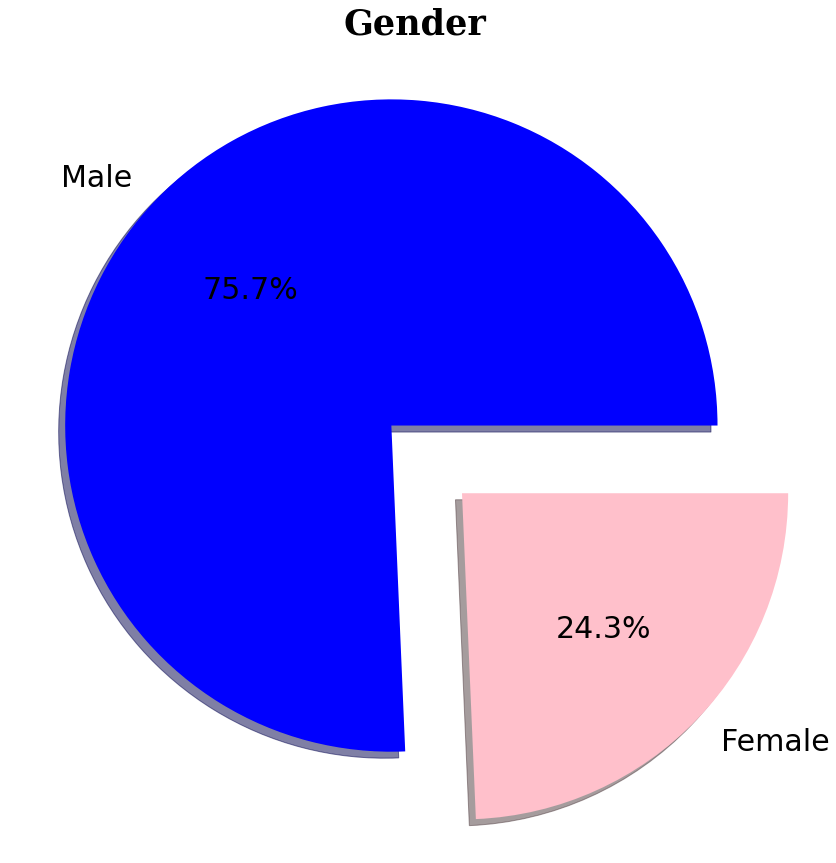

In [292]:
x = data['MemberGender'].value_counts()
x
plt.figure(figsize = [15,15] )
plt.rcParams['font.size'] = 30
plt.title('Gender',family='serif', weight='bold',fontsize = 35,loc='center',color='black');
plt.pie(x,labels=['Male','Female'] ,explode = [.1,.2] , shadow=True , colors=['blue','pink'], autopct='%0.1f%%');

### 2- In 2019 What is the most Lyft Bike used ? and What the trip average of this bike ? 

In [293]:
BakeIDNo = data['BikeId'].value_counts().idxmax()
print("The most frequent Bike used is Bike that hold ID number", BakeIDNo )

The most frequent Bike used is Bike that hold ID number 4742


In [294]:
data_bike = data[data['BikeId'] == 4742 ]
print("The trip average of 4742 bike is ", data_bike['TripDur'].mean() )

The trip average of 4742 bike is  757.3442906574395


### 3- In 2019 What is start stations are most popular for ride Lyft Bike? 

In [295]:
SartStationName = data['S.StationName'].value_counts().idxmax()
print("The most frequent start station used to ride a Bike is called", SartStationName )

The most frequent start station used to ride a Bike is called San Francisco Caltrain Station 2  (Townsend St at 4th St)


### 4- Between 5 months what is the most frequent ride Lyft Bike? 

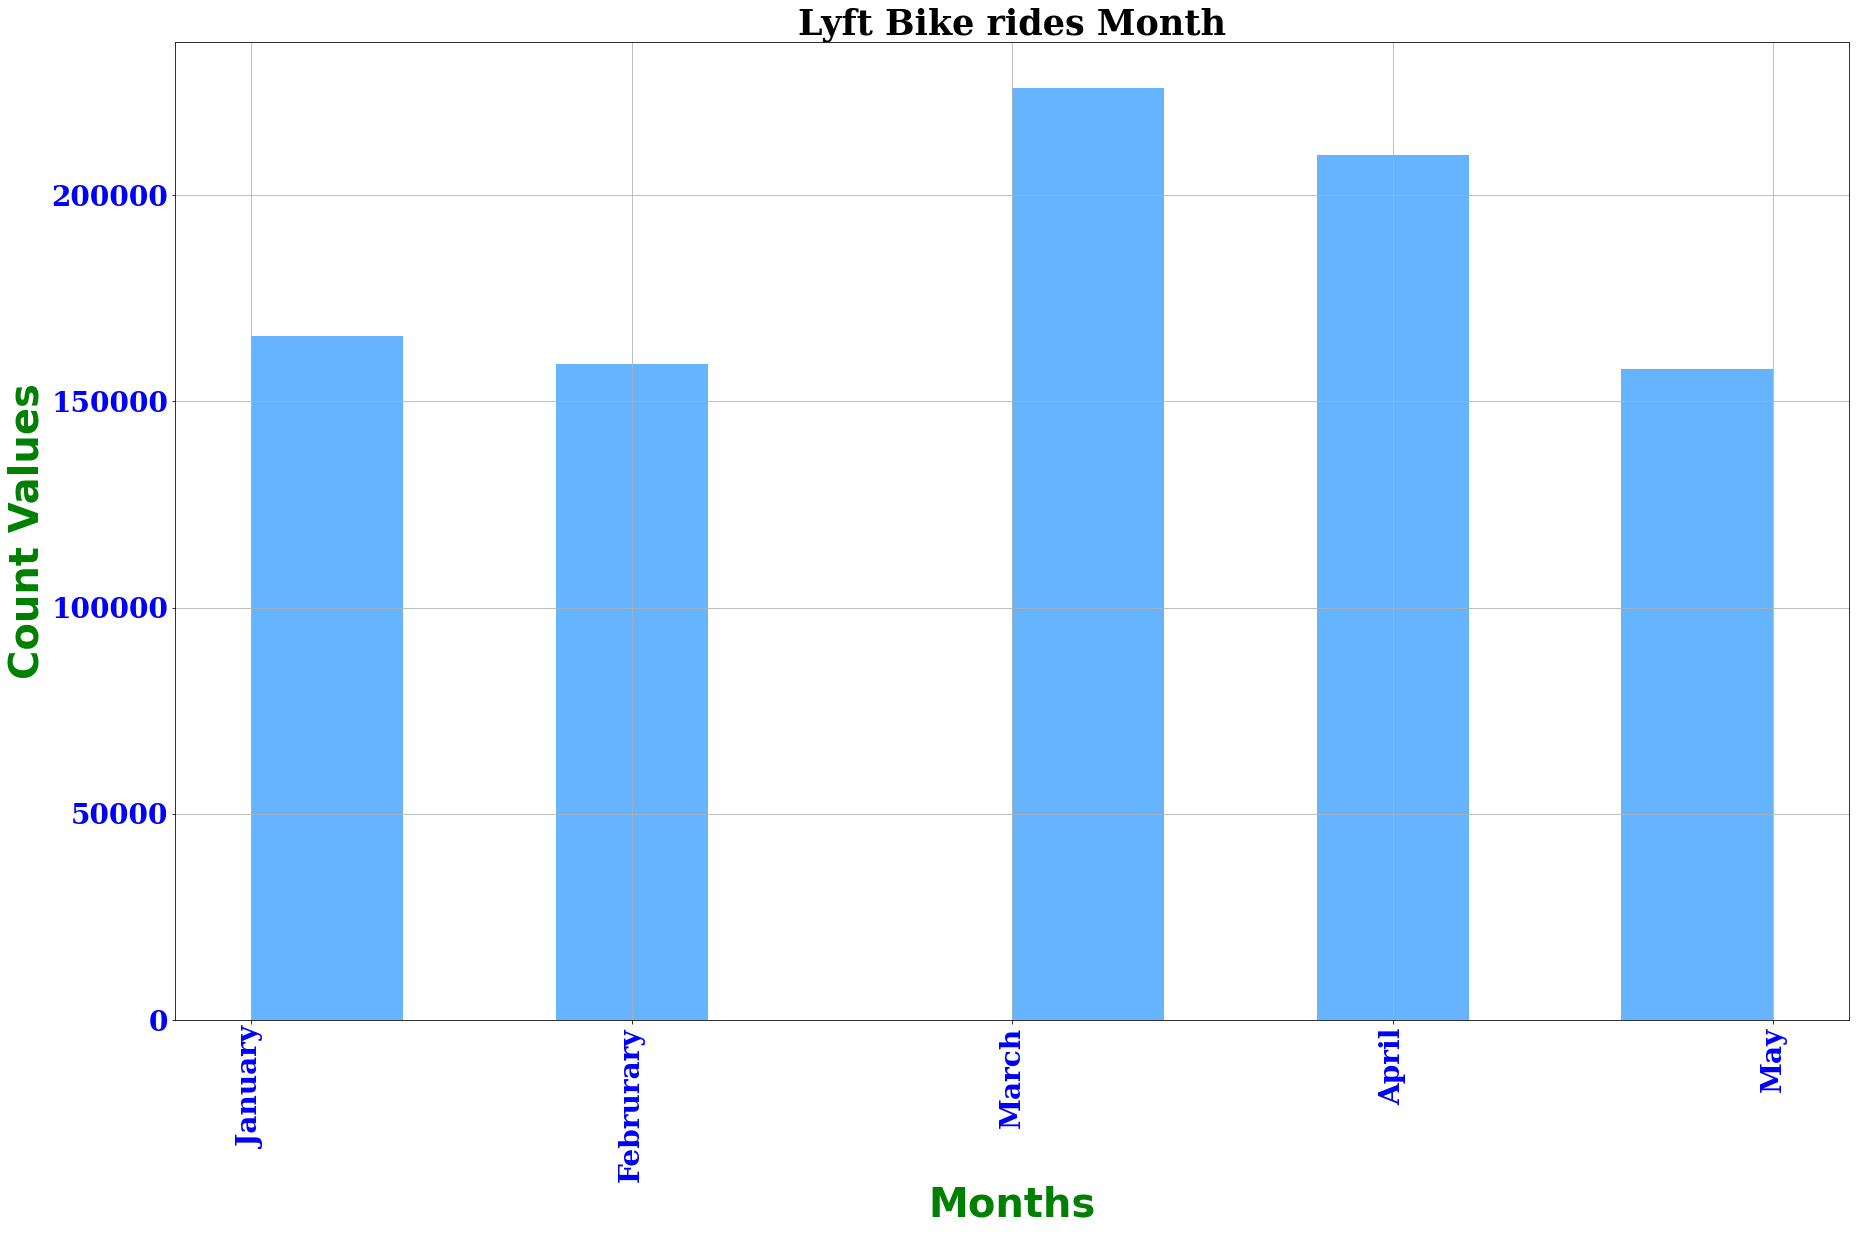

In [296]:
x = data['Month'].value_counts()
x
#new_x = np.arange(200000)
plt.figure(figsize=(30,18))
plt.grid()
plt.hist(data['Month'], color=['#66b3ff']);
months = ['Jan','Feb','Mar','Apr', 'May']
plt.xticks(fontsize = '28', family = 'serif',color='Blue' , rotation ='vertical', weight='bold');
plt.yticks(fontsize = '28', family = 'serif',color='Blue', weight='bold');
plt.xlabel('Months',fontsize = 40, weight = 'bold',color='green');
plt.ylabel('Count Values',fontsize = 40, weight = 'bold',color='green');
plt.title('Lyft Bike rides Month',family='serif', weight='bold',fontsize = 35,loc='center',color='black');

### 5- What is the commen user type to ride Lyft Bike ? is user prefer to subscribe or be normal customer ? 

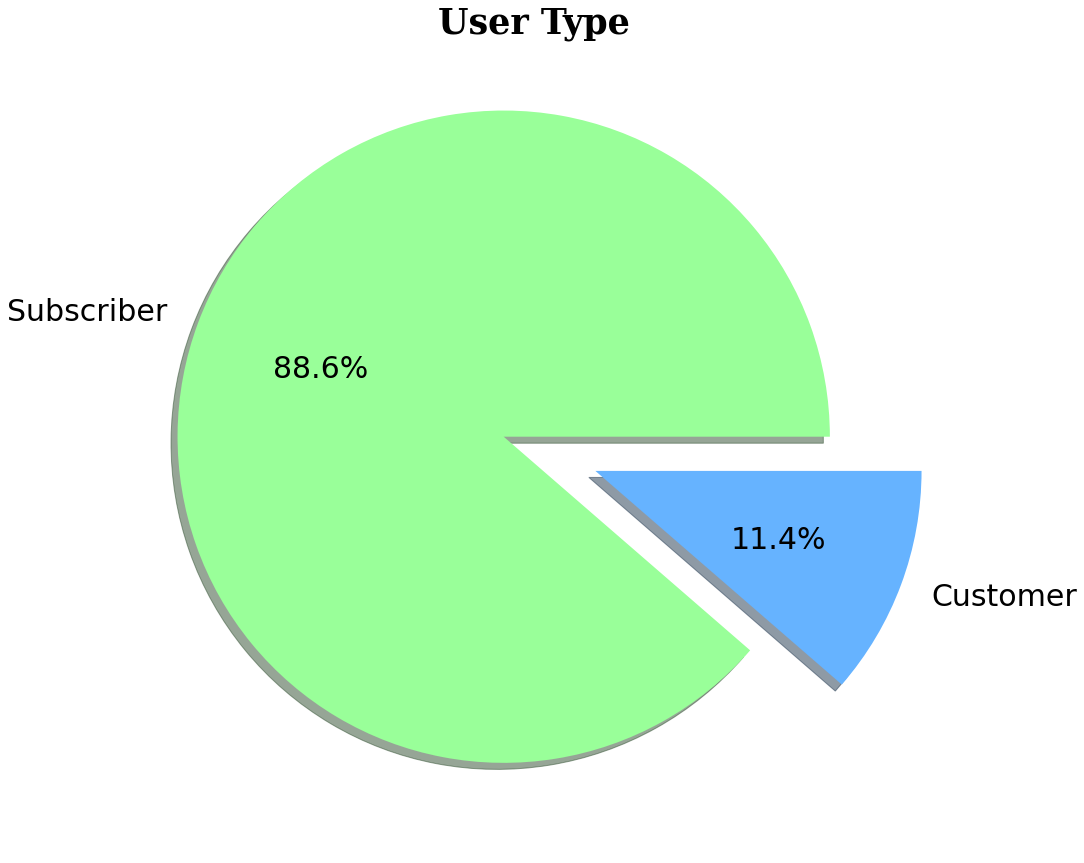

In [297]:
x = data['UserType'].value_counts()
x
colors = ['#ff9999','#66b3ff']
plt.figure(figsize = [15,15] )
plt.rcParams['font.size'] = 30
plt.title('User Type',family='serif', weight='bold',fontsize = 35,loc='center',color='black');
plt.pie(x,labels=['Subscriber','Customer'] ,explode = [.1,.2] , shadow=True, colors=['#99ff99','#66b3ff'], autopct='%0.1f%%');

### 6- What is the most age range ride Lyft Bike? 

In [298]:
x = data['Range'].value_counts()
x

Adult    911934
OLD        6291
Name: Range, dtype: int64

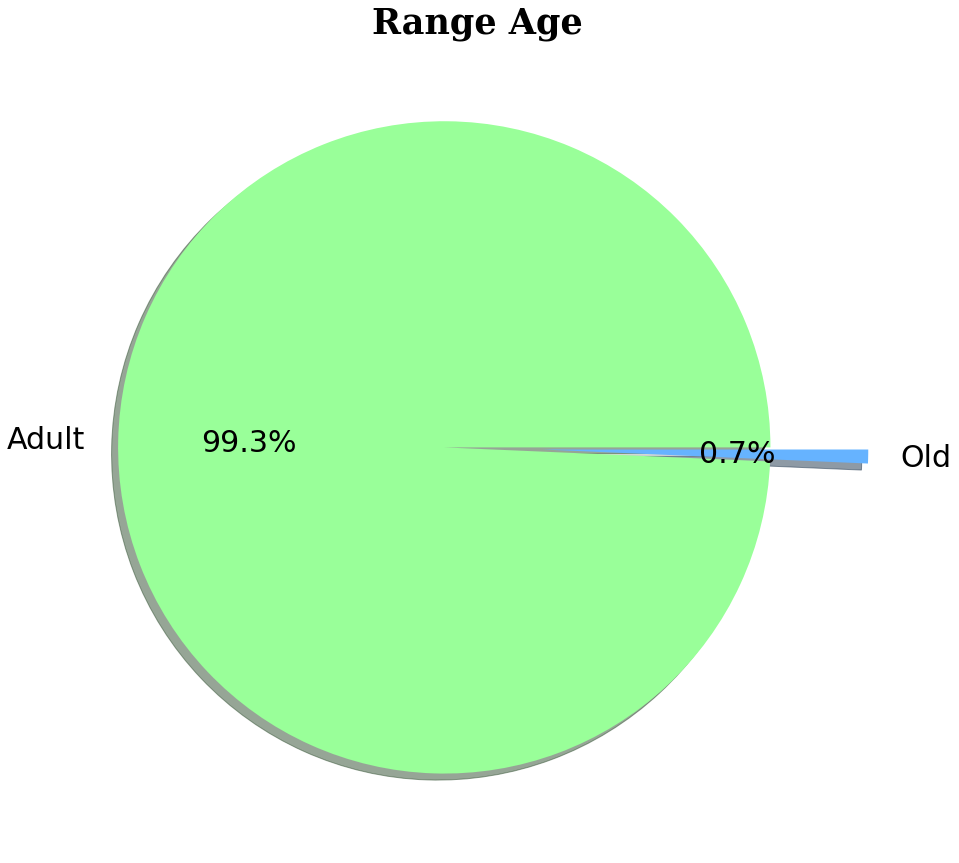

In [299]:
x = data['Range'].value_counts()
x
colors = ['#ff9999','#66b3ff']
plt.figure(figsize = [15,15] )
plt.rcParams['font.size'] = 30
plt.title('Range Age',family='serif', weight='bold',fontsize = 35,loc='center',color='black');
plt.pie(x,labels=['Adult','Old'] ,explode = [.1,.2] , shadow=True, colors=['#99ff99','#66b3ff'], autopct='%0.1f%%');

###  7- How many adult female have subscribe with Lyft Bike in 2019 ?

In [300]:
OF_sub = (data.MemberGender == 'Female') & (data.UserType == 'Subscriber') & (data.Range == 'Adult')
s=OF_sub.value_counts()

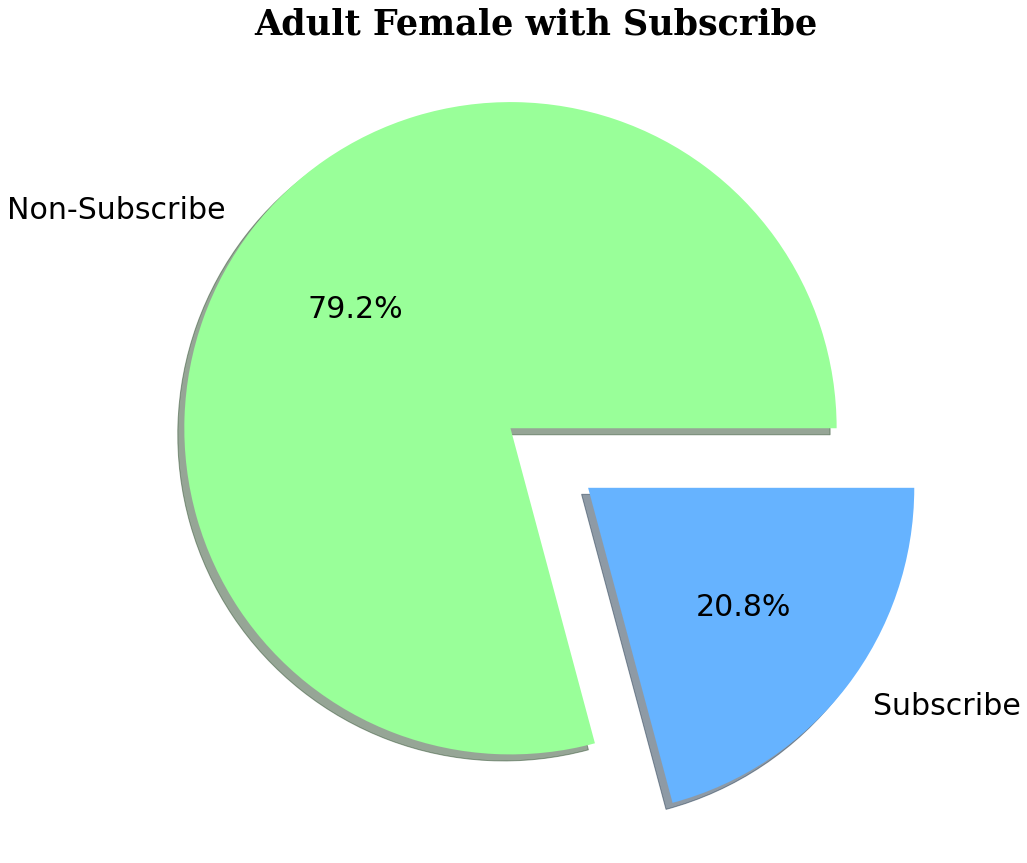

In [301]:
colors = ['#ff9999','#66b3ff']
plt.figure(figsize = [15,15] )
plt.rcParams['font.size'] = 30
plt.title('Adult Female with Subscribe',family='serif', weight='bold',fontsize = 35,loc='center',color='black');
plt.pie(s,labels=['Non-Subscribe','Subscribe'] ,explode = [.1,.2] , shadow=True, colors=['#99ff99','#66b3ff'], autopct='%0.1f%%');

<AxesSubplot:>

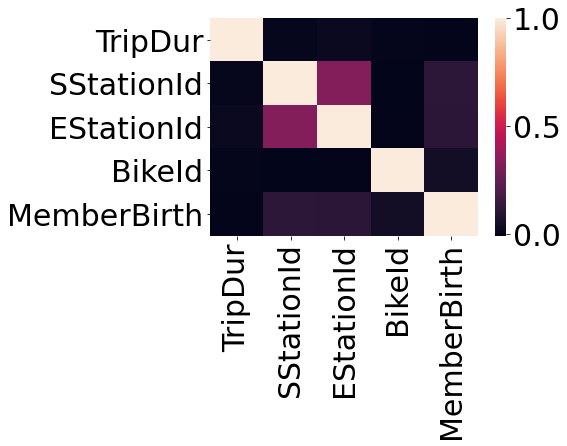

In [302]:
sns.heatmap(data.corr())

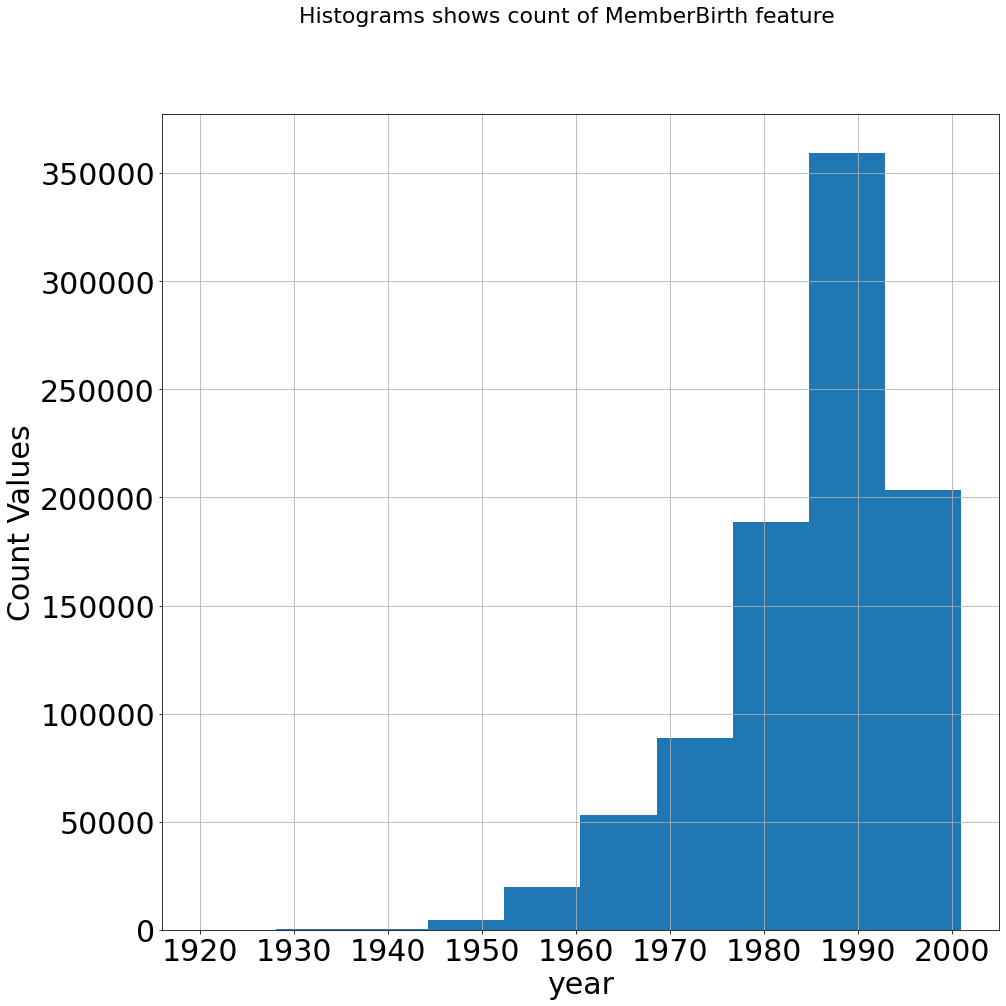

In [303]:
data['MemberBirth'].hist(figsize=(15,15))
plt.suptitle('Histograms shows count of MemberBirth feature', fontsize=22);
plt.xlabel('year')
plt.ylabel('Count Values');

/Users/fatenaldossary/opt/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


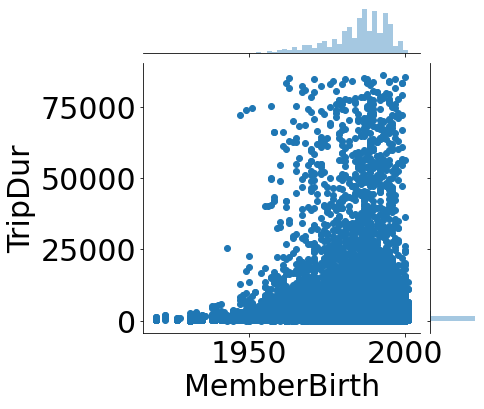

In [304]:
#  jointplot showing TripDur versus MemberBirth.
# There is no correlation 
sns.jointplot(x='MemberBirth',y='TripDur',data=data)

# Model

In [305]:
data.shape

(918225, 11)

In [306]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data.drop('Range', axis=1), data['Range'], 
                                                    test_size = 0.2, random_state=42)

train_df = X_train.copy()
train_df['Range'] = y_train
train_df.head()

,Month,TripDur,SStationId,S.StationName,EStationId,E.StationName,BikeId,UserType,MemberBirth,MemberGender,Range
173606,Februrary,192,126,Esprit Park,104,4th St at 16th St,4762,Subscriber,1973,Female,Adult
50806,May,664,41,Golden Gate Ave at Polk St,36,Folsom St at 3rd St,3196,Subscriber,1995,Male,Adult
115987,May,230,88,11th St at Bryant St,90,Townsend St at 7th St,1846,Subscriber,1981,Male,Adult
85781,April,209,20,Mechanics Monument Plaza (Market St at Bush St),22,Howard St at Beale St,2816,Subscriber,1985,Male,Adult
108220,May,971,23,The Embarcadero at Steuart St,114,Rhode Island St at 17th St,1857,Subscriber,1986,Male,Adult


In [307]:
train_df.shape

(734580, 11)

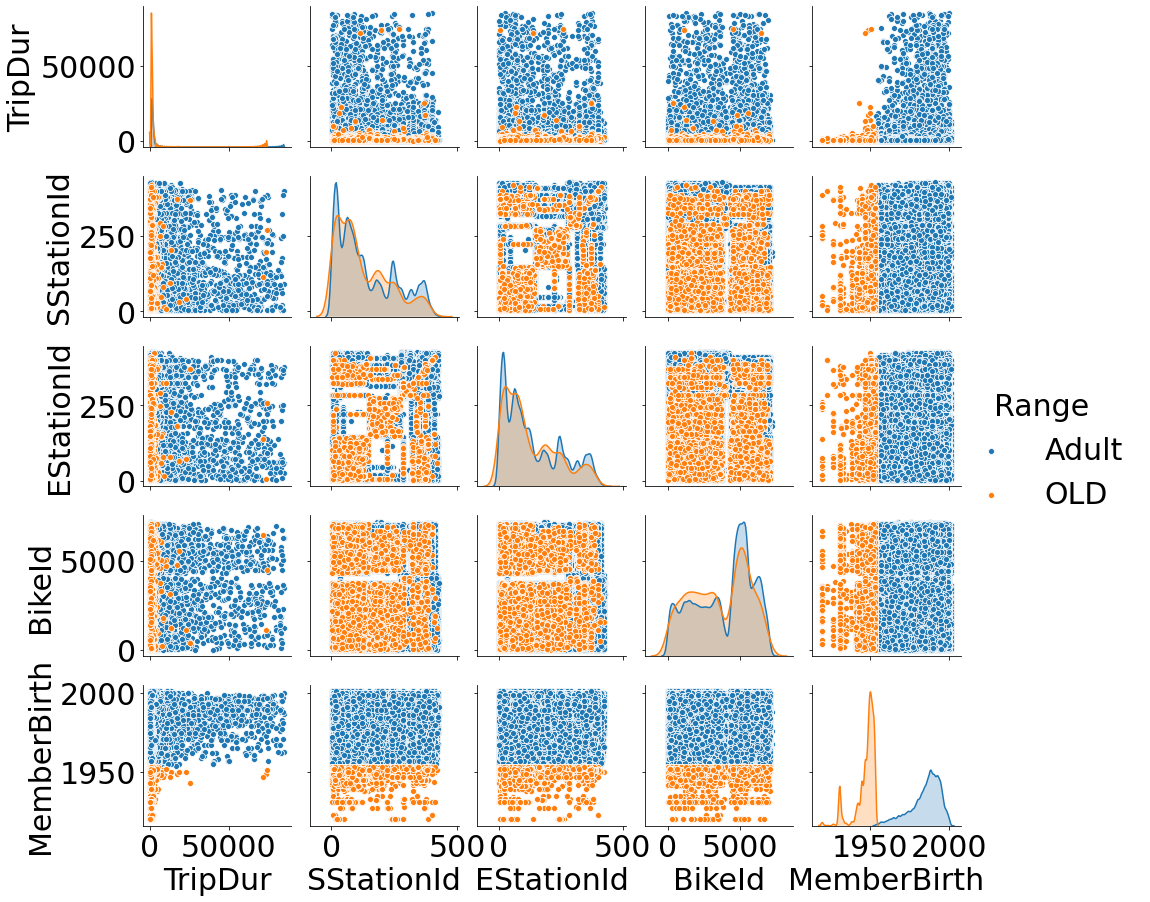

In [308]:
sns.pairplot(train_df, hue='Range');

TripDur and MemberBirth are the best selecation in this classifcation problem, because the overlab area under the curuve are very low, unlike other features the overlab very big

In [309]:
# linearly separates problem by use boxplot by pick one of good predicter 

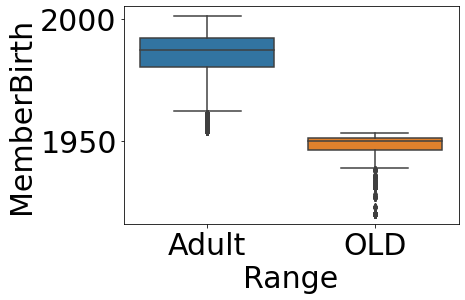

In [310]:
sns.boxplot(x='Range', y='MemberBirth', data=train_df);

In [311]:
# Train and fit a logistic regression model on the training set
lm1 = LogisticRegression() 
lm1.fit(X_train[['MemberBirth']], y_train)

LogisticRegression()

In [312]:
lm1.classes_ # Check the model classes

array(['Adult', 'OLD'], dtype=object)

In [313]:
# Get accuracy for train
lm1.score(X_train[['MemberBirth']], y_train) 

0.9931961120640366

In [314]:
#predict values for the testing data
predictions = lm1.predict(X_test[['MemberBirth']])

In [315]:
# Get accuracy for test 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9929592420158458

In [316]:
#  Create a classification report for the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

/Users/fatenaldossary/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Adult       0.99      1.00      1.00    182352
         OLD       0.00      0.00      0.00      1293

    accuracy                           0.99    183645
   macro avg       0.50      0.50      0.50    183645
weighted avg       0.99      0.99      0.99    183645



In [317]:
# Print the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[182352      0]
 [  1293      0]]


I noticed here the FN values is very high that mean our model dose't recognize Old values ! because the Adult is more values compare to Old value. 

#  Thank you 
### Faten Aldossary